# Basketball Teams and Leagues Project - Group ID: 7

Group Members:

Ali Arda Girgin (26993)

Efe Alpay (22417)

Eren Mutlu (25284)

Kamil Atakan Çelikyürek (26896)


## Introduction

In basketball leagues; most of the time, the teams have a star player during the seasonal games which can be considered as having more possession than other teammates. If the star player in a team has a better percentage of FGM/FGA than the star players among the other teams in their league is more likely to be successful/champion. The main purpose of this project is to examine the success of a team among the others in a basketball league.
 

### Problem Definition

We defined a term "Player Point" as ((FGM x 2) + (3PM x 3) / (FGA x 2) + (3PA x 3)) for star player of each team.

With this research our aim is to determine a star player for each team (we considered the star player as the player that have the most "Player Point" in a team) and corralate his "Player Point" among other star players in the whole season by making investigations in the data of FGA (i.e. Field Goals Attempt), FGM (i.e. Field Goals Made), 3PA (i.e. Three Points Attempt), 3PM (i.e. Three Points Made) and the data of champions and runner-ups of that season.

The order the of this research as follows:

Determine a star player for each team among seasons

Find the "Player Point" of each star player that we found

Find champions and runner-ups per season (championsdata and runnerupsdata)

Comparing the star players of the champions and the runner-ups per season.

Determine whether the star player of champion team is better than from the star player of runner-up team or not and compare stats of both players

### Utilized Datasets

We have several data sets. 

The first data set that are we going to use is "Basketball Teams and Leagues" which includes the stats of each player (e.g. FGM, FGA) for all leagues (e.g. NBA, Euroleague). We will only use the "NBA League".

First Data Link: ​https://www.kaggle.com/jacobbaruch/basketball-players-stats-per-season-49-leagues


The second and the third of the data that we are going to use is "NBA Champions and Runner-ups" which includes the champions and runner-ups for each season.

Second & Third Data Link: https://www.kaggle.com/daverosenman/nba-finals-team-stats

In [ ]:
# Importing data from Google Drive
from google.colab import drive
drive.mount("./drive")
path_prefix = "./drive/My Drive/Colab Folder/cs210_term_project"

Mounted at ./drive


In [ ]:
# Loading modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
%matplotlib inline

In [ ]:
# Reading data that imported from Google Drive
filename_first_data = "players_stats_by_season_full_details.csv"
filename_second_data = "championsdata.csv"
filename_third_data = "runnerupsdata.csv"
first_dataframe = pd.read_csv(join(path_prefix, filename_first_data))
second_dataframe = pd.read_csv(join(path_prefix, filename_second_data))
third_dataframe = pd.read_csv(join(path_prefix, filename_third_data))

In [ ]:
# Arranging first data for the hypothesis part
players_dataframe = first_dataframe[first_dataframe["League"] == "NBA"]
players_dataframe = players_dataframe[players_dataframe["Stage"] == "Regular_Season"]
players_dataframe = players_dataframe.drop(["League", "Stage"], axis = 1)
list_of_seasons = ["1999 - 2000", "2000 - 2001", "2001 - 2002", "2002 - 2003", "2003 - 2004", "2004 - 2005", "2005 - 2006", "2006 - 2007", "2007 - 2008", "2008 - 2009",
                   "2009 - 2010", "2010 - 2011", "2011 - 2012", "2012 - 2013", "2013 - 2014", "2014 - 2015", "2015 - 2016", "2016 - 2017", "2017 - 2018"]
players_dataframe = players_dataframe[players_dataframe["Season"].apply(lambda x : x in list_of_seasons)]
players_dataframe.head(3)

,Season,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
0,1999 - 2000,Shaquille O'Neal,LAL,79,3163.0,956,1665,0,1,432,824,223,255,336,742,1078,299,36,239,2344,1972.0,Mar,"Mar 6, 1972",7-1,216.0,325.0,147.0,United States,Robert G. Cole High School,1.0,1.0,Orlando Magic
1,1999 - 2000,Vince Carter,TOR,82,3126.0,788,1696,95,236,436,551,178,263,150,326,476,322,110,92,2107,1977.0,Jan,"Jan 26, 1977",6-6,198.0,220.0,100.0,United States,Mainland High School,1.0,5.0,Golden State Warriors
2,1999 - 2000,Karl Malone,UTA,82,2947.0,752,1476,2,8,589,739,231,229,169,610,779,304,79,71,2095,1963.0,Jul,"Jul 24, 1963",6-9,206.0,265.0,120.0,United States,Summerfield High School,1.0,13.0,Utah Jazz


<font color = "brown">
<font size = 4px>
As it can easily seen in the dataframe, we restricted the years in between 1999 and 2018. Also, we just worked on NBA's regular season games.
</font>


In [ ]:
# Arranging second data and forming the champions data with respect to years
second_dataframe = second_dataframe[second_dataframe["Year"] >= 2000]
champions_year_team_dict = {}
for index, row in second_dataframe.iterrows():
  if row["Year"] not in champions_year_team_dict.keys():
    string = str(row["Year"] - 1) + " - " + str(row["Year"])
    champions_year_team_dict[string] = row["Team"]

In [ ]:
# Arranging third data and forming the runner-ups data with respect to years
third_dataframe = third_dataframe[third_dataframe["Year"] >= 2000]
runnerups_year_team_dict = {}
for index, row in third_dataframe.iterrows():
  if row["Year"] not in runnerups_year_team_dict.keys():
    string = str(row["Year"] - 1) + " - " + str(row["Year"])
    runnerups_year_team_dict[string] = row["Team"]

In [ ]:
# Storing the data of season list
list_of_years = list(champions_year_team_dict.keys())

In [ ]:
# Combining second and third data and forming a dataframe
champions_runnerups_dataframe = pd.DataFrame(champions_year_team_dict.keys(), columns = ["Years"])
champions_runnerups_dataframe["Champions"] = champions_year_team_dict.values()
champions_runnerups_dataframe["Runnerups"] = runnerups_year_team_dict.values()
champions_runnerups_dataframe = champions_runnerups_dataframe.set_index("Years")

In [ ]:
# Forming dictionary for converting teams to abbreviations of the second and third data
teams_abbreviations_dictionary = {"Lakers": "LAL", "Pacers": "IND", "Sixers": "PHI", "Nets": "NJN",
                                  "Spurs": "SAS", "Pistons": "DET", "Heat": "MIA", "Mavericks": "DAL",
                                  "Cavaliers": "CLE", "Celtics": "BOS", "Magic": "ORL", "Thunder": "OKC",
                                  "'Heat'": "MIA", "Warriors": "GSW"}

# Implementing the dictionary on the data
champions_runnerups_dataframe["Champions"] = champions_runnerups_dataframe["Champions"].apply(lambda x : teams_abbreviations_dictionary[x])
champions_runnerups_dataframe["Runnerups"] = champions_runnerups_dataframe["Runnerups"].apply(lambda x : teams_abbreviations_dictionary[x])
champions_runnerups_dataframe.head(6)

,Champions,Runnerups
Years,,
1999 - 2000,LAL,IND
2000 - 2001,LAL,PHI
2001 - 2002,LAL,NJN
2002 - 2003,SAS,NJN
2003 - 2004,DET,LAL
2004 - 2005,SAS,DET


<font color = "brown">
<font size = 4px>
This visualization shown on top is about the champions & runnerups season by season.
</font>

## Data Exploration

We preprocessed the raw data priorly, and we processed the data in such a manner that we can use.

We compared the star players of champion and runnerup team as we want to conclude the amount that hypothesis holds. To acquire, we counted the years whether our hypothesis holds or fails.

We showed our results in bar charts below.

In [ ]:
# Discarding the players that have less points than the mean
players_dataframe = players_dataframe[players_dataframe["FGA"] >= players_dataframe["FGA"].mean()]

# Calculating point for each player
players_dataframe["Player Point"] = ((players_dataframe["FGM"] * 2) + (players_dataframe["3PM"] * 3)) / ((players_dataframe["FGA"] * 2) + (players_dataframe["3PA"] * 3))

In [ ]:
# Forming an empty dictionary to store truthness of the hypothesis for each season
hypothesis_truthness_counts = [0, 0]

# Forming lists for visualization
list_of_players_champion_player_name = []
list_of_players_champion_player_point = []
list_of_players_runnerup_player_name = []
list_of_players_runnerup_player_point = []

# Iterating over the years to perform hypothesis on each season
for season in list_of_years:
  current_season_champion = champions_runnerups_dataframe.loc[season, "Champions"]
  current_season_runnerup = champions_runnerups_dataframe.loc[season, "Runnerups"]
  players_of_champion = players_dataframe[(players_dataframe["Season"] == season) & (players_dataframe["Team"] == current_season_champion)]
  players_of_champion = players_of_champion[["Player", "Player Point"]].sort_values(by = "Player Point", ascending = False)
  players_of_champion = players_of_champion.reset_index(drop = True)
  players_of_runnerup = players_dataframe[(players_dataframe["Season"] == season) & (players_dataframe["Team"] == current_season_runnerup)]
  players_of_runnerup = players_of_runnerup[["Player", "Player Point"]].sort_values(by = "Player Point", ascending = False)
  players_of_runnerup = players_of_runnerup.reset_index(drop = True)
  list_of_players_champion_player_name.append(players_of_champion.iloc[0, 0])
  list_of_players_champion_player_point.append(players_of_champion.iloc[0, 1])
  list_of_players_runnerup_player_name.append(players_of_runnerup.iloc[0, 0])
  list_of_players_runnerup_player_point.append(players_of_runnerup.iloc[0, 1])
  if players_of_champion.iloc[0, 1] > players_of_runnerup.iloc[0, 1]:
    hypothesis_truthness_counts[0] += 1
  else:
    hypothesis_truthness_counts[1] += 1

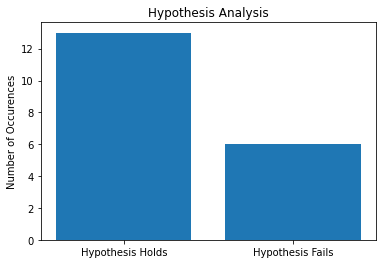

In [ ]:
# Visualizing the results
plt.bar(["Hypothesis Holds", "Hypothesis Fails"], hypothesis_truthness_counts)
plt.title("Hypothesis Analysis")
plt.ylabel("Number of Occurences")
plt.show()

<font color = "brown">
<font size = 4px>
The visualization on "Hypothesis Analysis" is about showing how frequently our hypothesis is the case. According the findings our hypothesis holds 13 times and failed 6 times, where it makes our hypothesis near 68 percent correct. It is much more less than we expected. We can conclude that our hypothesis is not comprehensive enough to match for all matches.
</font>


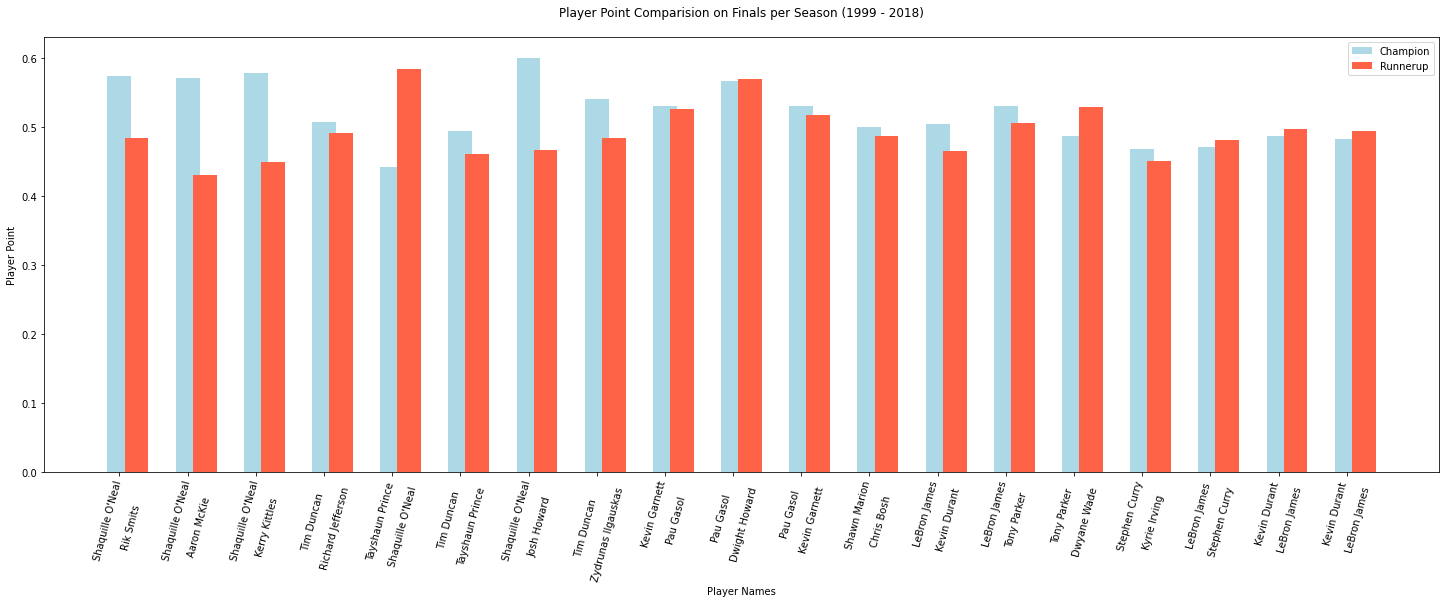

In [ ]:
# Combining the names of champions and runnerups
list_all_names = []
for i in range(19):
  list_all_names.append(list_of_players_champion_player_name[i] + "\n\n" + list_of_players_runnerup_player_name[i])

# Visualizing the results (comparing players on final matches over seasons)
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(25, 8)
champions = ax.bar(np.arange(19), list_of_players_champion_player_point, width = 0.35, color = 'lightblue')
runnerups = ax.bar(np.arange(19) + 0.25, list_of_players_runnerup_player_point, width = 0.35, color = 'tomato')
ax.set_xticks(np.arange(19))
ax.set_xticklabels(list_all_names, rotation = 75)
ax.set_title('Player Point Comparision on Finals per Season (1999 - 2018)\n')
ax.set_xlabel('Player Names')
ax.set_ylabel('Player Point')
ax.legend((champions, runnerups), ("Champion", "Runnerup"))
plt.show()

<font color = "brown">
<font size = 4px>
The visualization of "Player Point Comparision on Finals per Season (1999 - 2018)" is showing that our hypothesis fails in the last seasons mostly. It can also be inferred that in the last few years, the difference between player points less than compared the first years. Also, over the years in finals, player point of both star players are getting closer to each other.
</font>

## Machine Learning Models

In this part, we implemented Decision Tree and Random Forest algorithms for our hypothesis. Also, we add another efficiency type that is currently using in NBA.
Then we compared machine learning models for each efficiency type (one is our efficiency score, namely our player point, the other is NBA's efficiency score).

NBA’s actual efficiency score is on a website "https://www.basketball-reference.com/".

For this part of the project, we used all NBA players of our data.

### Implementation

In [ ]:
# Loading Machine Learning modules
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [ ]:
# Preprocessing the data in a form that we can use
ml_raw_dataframe = first_dataframe[first_dataframe["League"] == "NBA"]
ml_raw_dataframe = ml_raw_dataframe[["GP", "MIN", "Season", "birth_year", "PTS", "REB", "AST", "STL", "BLK", "FGA", "FGM", "FTA", "FTM", "TOV", "3PA", "3PM"]]
ml_raw_dataframe["EFF_our_approach"] = (2 * ml_raw_dataframe["FGM"] + 3 * ml_raw_dataframe["3PM"]) / (2 * ml_raw_dataframe["FGA"] + 3 * ml_raw_dataframe["3PA"])
ml_raw_dataframe["EFF_NBA_approach"] = (ml_raw_dataframe["PTS"] + ml_raw_dataframe["REB"] + ml_raw_dataframe["AST"] + ml_raw_dataframe["STL"] + ml_raw_dataframe["BLK"] - ((ml_raw_dataframe["FGA"] - ml_raw_dataframe["FGM"]) + (ml_raw_dataframe["FTA"] - ml_raw_dataframe["FTM"]) + ml_raw_dataframe["TOV"]))
ml_raw_dataframe["AGE"] = ml_raw_dataframe["Season"].apply(lambda x : int(x[7:])) - ml_raw_dataframe["birth_year"]

In [ ]:
# Creating a new dataframe for to test machine learning algorithms on our approach
ml_df_our_approach = ml_raw_dataframe
ml_df_our_approach["eff_mean_exceed_our_approach"] = ml_df_our_approach["EFF_our_approach"] > ml_df_our_approach["EFF_our_approach"].mean()
ml_df_our_approach["eff_mean_exceed_our_approach"] = ml_df_our_approach["eff_mean_exceed_our_approach"].apply(lambda x : {True: 1, False: 0}[x])
ml_df_our_approach = ml_df_our_approach[["GP", "MIN", "PTS", "AGE", "eff_mean_exceed_our_approach"]]
ml_df_our_approach.head(6)

,GP,MIN,PTS,AGE,eff_mean_exceed_our_approach
0,79,3163.0,2344,28.0,1
1,82,3126.0,2107,23.0,1
2,82,2947.0,2095,37.0,1
3,70,2853.0,1989,25.0,0
4,82,3425.0,1982,32.0,0
5,82,3148.0,1939,26.0,0


<font color = "brown">
<font size = 4px>
In the dataframe above, four of features and the binary representation that whether player point of our approach exceed its mean or not.  We are trying to learn whether our efficieny model is applicable or not.
</font>

In [ ]:
# Creating a new dataframe for to test machine learning algorithms on NBA's approach
ml_df_NBA_approach = ml_raw_dataframe
ml_df_NBA_approach["eff_mean_exceed_NBA_approach"] = ml_df_NBA_approach["EFF_NBA_approach"] > ml_df_NBA_approach["EFF_NBA_approach"].mean()
ml_df_NBA_approach["eff_mean_exceed_NBA_approach"] = ml_df_NBA_approach["eff_mean_exceed_NBA_approach"].apply(lambda x : {True: 1, False: 0}[x])
ml_df_NBA_approach = ml_df_NBA_approach[["GP", "MIN", "PTS", "AGE", "eff_mean_exceed_NBA_approach"]]
ml_df_NBA_approach.head(6)

,GP,MIN,PTS,AGE,eff_mean_exceed_NBA_approach
0,79,3163.0,2344,28.0,1
1,82,3126.0,2107,23.0,1
2,82,2947.0,2095,37.0,1
3,70,2853.0,1989,25.0,1
4,82,3425.0,1982,32.0,1
5,82,3148.0,1939,26.0,1


<font color = "brown">
<font size = 4px>
Similarly, in the dataframe above, four of features and the binary representation that whether player point of NBA's approach exceed its mean or not. We are trying to learn whether NBA's efficieny model is applicable or not.
</font>

In [ ]:
# Splitting to data to three parts; train data, validation data and test data
x_train_our_approach, x_valid_and_test_our_approach, y_train_our_approach, y_valid_and_test_our_approach = train_test_split(ml_df_our_approach[["GP", "MIN", "PTS", "AGE"]], ml_df_our_approach["eff_mean_exceed_our_approach"], test_size = 0.2, random_state = 42)
x_val_our_approach, x_test_our_approach, y_val_our_approach, y_test_our_approach = train_test_split(x_valid_and_test_our_approach, y_valid_and_test_our_approach, test_size = 0.5, random_state = 42)

# Implementing Decision Tree Algorithm and finding its accuracy on our approach
decision_tree_our_approach = DecisionTreeClassifier(criterion = "entropy")
decision_tree_our_approach.fit(x_train_our_approach, y_train_our_approach)
accuracy_dt_our_approach = accuracy_score(y_val_our_approach, decision_tree_our_approach.predict(x_val_our_approach))
print("Decision Tree Algorithm Accuracy (our approach): ", round(100 * accuracy_dt_our_approach, 4), "%", sep = "")

# Implementing Random Forest Algorithm and finding its accuracy on our approach
random_forest_our_approach = RandomForestClassifier(criterion = "entropy", random_state = 42, n_estimators = 100, min_samples_split = 2)
random_forest_our_approach.fit(x_train_our_approach, y_train_our_approach)
accuracy_rf_our_approach = accuracy_score(y_val_our_approach, random_forest_our_approach.predict(x_val_our_approach))
print("Random Forest Algorithm Accuracy (our approach): ", round(100 * accuracy_rf_our_approach, 4), "%", sep = "")

# Implementing Random Forest Algorithm with best hyperparameters and finding its accuracy on our approach
parameters = {"min_samples_split":[2, 4], "n_estimators":[100, 200, 300]}
rf_grid_our_approach = GridSearchCV(estimator = RandomForestClassifier(criterion = "entropy", random_state = 42), param_grid = parameters)
rf_grid_our_approach.fit(x_train_our_approach, y_train_our_approach)
accuracy_rfgrid_our_approach = accuracy_score(y_val_our_approach, rf_grid_our_approach.predict(x_val_our_approach))
print("Random Forest Algorithm Accuracy with best hyperparameters (our approach): ", round(100 * accuracy_rfgrid_our_approach, 4), "%", sep = "")

Decision Tree Algorithm Accuracy (our approach): 50.0%
Random Forest Algorithm Accuracy (our approach): 54.2623%
Random Forest Algorithm Accuracy with best hyperparameters (our approach): 54.2623%


In [ ]:
# Splitting to data to three parts; train data, validation data and test data
x_train_NBA_approach, x_valid_and_test_NBA_approach, y_train_NBA_approach, y_valid_and_test_NBA_approach = train_test_split(ml_df_NBA_approach[["GP", "MIN", "PTS", "AGE"]], ml_df_NBA_approach["eff_mean_exceed_NBA_approach"], test_size = 0.2, random_state = 42)
x_val_NBA_approach, x_test_NBA_approach, y_val_NBA_approach, y_test_NBA_approach = train_test_split(x_valid_and_test_NBA_approach, y_valid_and_test_NBA_approach, test_size = 0.5, random_state = 42)

# Implementing Decision Tree Algorithm and finding its accuracy on NBA's approach
decision_tree_NBA_approach = DecisionTreeClassifier(criterion = "entropy")
decision_tree_NBA_approach.fit(x_train_NBA_approach, y_train_NBA_approach)
accuracy_dt_NBA_approach = accuracy_score(y_val_NBA_approach, decision_tree_NBA_approach.predict(x_val_NBA_approach))
print("Decision Tree Algorithm Accuracy (NBA approach): ", round(100 * accuracy_dt_NBA_approach, 4), "%", sep = "")

# Implementing Random Forest Algorithm and finding its accuracy on NBA's approach
random_forest_NBA_approach = RandomForestClassifier(criterion = "entropy", random_state = 42, n_estimators = 100, min_samples_split = 2)
random_forest_NBA_approach.fit(x_train_NBA_approach, y_train_NBA_approach)
accuracy_rf_NBA_approach = accuracy_score(y_val_NBA_approach, random_forest_NBA_approach.predict(x_val_NBA_approach))
print("Random Forest Algorithm Accuracy (NBA approach): ", round(100 * accuracy_rf_NBA_approach, 4), "%", sep = "")

# Implementing Random Forest Algorithm with best hyperparameters and finding its accuracy on NBA's approach
parameters = {"min_samples_split":[2, 4], "n_estimators":[100, 200, 300]}
rf_grid_NBA_approach = GridSearchCV(estimator = RandomForestClassifier(criterion = "entropy", random_state = 42), param_grid = parameters)
rf_grid_NBA_approach.fit(x_train_NBA_approach, y_train_NBA_approach)
accuracy_rfgrid_NBA_approach = accuracy_score(y_val_NBA_approach, rf_grid_NBA_approach.predict(x_val_NBA_approach))
print("Random Forest Algorithm Accuracy with best hyperparameters (NBA approach): ", round(100 * accuracy_rfgrid_NBA_approach, 4), "%", sep = "")

Decision Tree Algorithm Accuracy (NBA approach): 92.7869%
Random Forest Algorithm Accuracy (NBA approach): 94.5902%
Random Forest Algorithm Accuracy with best hyperparameters (NBA approach): 94.918%


### Results & Discussion

In this part of the project, we discussed about players and their efficiency scores. First, we determined efficiency score by looking features such as FGM, FGA, 3PM and 3PA in the data and we finalized the our efficiency formula as 
"(FGM x 2) + (3PM x 3) / (FGA x 2) + (3PA x 3)".

We applied this formula for all of the NBA players, and checked if the player's efficiency average is higher than the mean of efficiency, we counted that player as exceeded average player.

We also applied the formula that NBA determined for all of the NBA players again and if the player exceed the average, we count player as exceeded average player.

We got two large data of same NBA players, the only difference of the two data is calculation of the efficiency score. We separated datas into 3 parts for training (80% of data), validation (10% of data) and test (10% of data). After we split these two data, we compared two different efficiency scores with using two different Machine Learning methods for each data. 

Firstly, we used Decision Tree. After we got the first results, we found that our calculation method is inefficient. We got 50.0% accuracy. On the other hand, NBA’s current efficiency calculator had 92.7% accuracy. Then, we used Random Forest Algorithm. The accuracy scores of both calculations increased. Our efficiency score had 54.3% accuracy and NBA’s current efficiency score had %94.9 accuracy. 

As it can be easily observed, there is 4.3% increase on accuracy between machine learning methods for our approach. Also, there is 2.2% increase on accuracy on the data with NBA's efficiency score calculation.

If we compare two of the Machine Learning methods that we used, accuracy-wise Random Forest Algorithm is better than Decision Tree Algorithm for the both cases. In the Random Forest Algorithm we had more control on the over-fitting where it resulted to increase the accuracy.

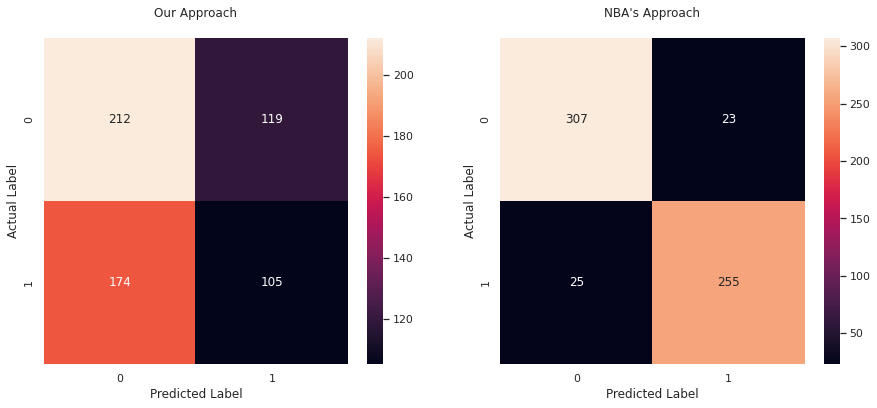

In [ ]:
# Visualizing the results on the test datas
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
matrix_our_approach = confusion_matrix(y_test_our_approach, rf_grid_our_approach.predict(x_test_our_approach))
matrix_NBA_approach = confusion_matrix(y_test_NBA_approach, rf_grid_NBA_approach.predict(x_test_NBA_approach))
sns.heatmap(matrix_our_approach, ax = ax[0], annot = True, fmt = 'd')
ax[0].set_title('Our Approach\n')
ax[0].set_xlabel('Predicted Label')
ax[0].set_ylabel('Actual Label')
sns.heatmap(matrix_NBA_approach, ax = ax[1], annot = True, fmt = 'd')
ax[1].set_title('NBA\'s Approach\n')
ax[1].set_xlabel('Predicted Label')
ax[1].set_ylabel('Actual Label')
plt.show()

<font color = "brown">
<font size = 4px>
In the visualization on above, we tried to compare our approach and NBA's approach. According to the findings, NBA's approach for efficiency is much more applicable than our approach as it has more successful for qualifying the player whether he is effective or not. As it can be inferred from the heatmaps that NBA has more accuracy on recognizing effective players as correctly effective (which corresponds to TP).
</font>

## Conclusion

In the progress report, we determined the star players of each team and calculated the efficiency score for these players. In conclusion, we got finalist teams for every season and tried to predict the winner based on the star players. This situation leads to lack of data as we have just 19 seasons in hand and we ignore many players as we just use star players in teams. 

However, in this report, we changed our approach and tried to look our efficiency scores’ reliability. We also found NBA’s current efficiency calculating method. Then, we compared NBA’s and our method of calculation based on several machine learning methods.

The main reason that our efficiency score is inefficient is because of the lack of features while calculating the efficiency score of each player. When we are trying to calculate efficiency score of each player, in our method we used four features whereas NBA used ten features. Because of the difference on the number of features NBA's efficiency calculation is more comprehensive.

Features of Our Approach: FGA, FGM, 3PA, 3PM

Features of NBA's Approach: PTS, REB, AST, STL, BLK, FGA, FGM, FTA, FTM, TOV

## Future Work

It can be implemented new efficiency scores that will be more accurate. Also, the prediction features can be extended to get more accurate results.

## Work Division

Ali Arda Girgin: Implementing the Introduction part, determining problem and utilizing the data for Data Exploration / completed the Machine Learning part

Efe Alpay: Determining problem and utilizing the data for Data Exploration / implemented the graphics of Machine Learning part

Eren Mutlu: Searching about Machine Learning Algorithms and trying them / setting up the Conclusion part / came up with ideas for future work

Kamil Atakan Çelikyürek: Coding part of the Data Exploration / completed the Machine Learning part